<a href="https://colab.research.google.com/github/sross1/SeniorProject_studentStudyAssistant/blob/main/StudentDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree

Notes: 
Do you like online learning? (If other, explain why.) ---> 0=no 1=yes 2=depends

If you need help with homework/studying, what do you go to first? --->
Google/Internet=0 Notes=1 Textbook=2 Friends/classmates=3 Tutor=4 Professor=5 Family=6

Style of Learning ---> Visual/Reading/Writing=1 Auditory=2 Kinesthetic/Tactile=3  




In [ ]:
#Libraries
%matplotlib inline
import matplotlib.pyplot as plt

import io

import pandas as pd
from pandas import read_csv

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import pydotplus #pip install pydotplus

from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#For Google Sheets
from google.colab import files

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

In [ ]:
#Import .csv here from computer https://www.youtube.com/watch?v=dEB-7w3jBKU
#upload_files = files.upload()
#for filename in upload_files.keys():
#  x=upload_files[filename].decode('utf-8')
#data1 = pd.read_csv(io.StringIO(x), header=None)
#print(data1.head())

In [ ]:
#Import directly from Google Sheets
gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('X_train').sheet1

# get_all_values gives a list of rows
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render
data = pd.DataFrame.from_records(rows)
data

[['Timestamp', 'Email Address', 'What is your first name?', 'What is your last name?', 'What is your age?', 'Do you like online learning? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1, Depends = 2', 'How often do you procrastinate?', 'If you need help with homework/studying, what do you go to first? (Choose the number that corresponds best with your answer:)  Google/Internet = 0, Notes = 1, Textbook = 2, Friends/classmates = 3, Tutor = 4, Professor = 5, Family = 6', 'Do you use online study tools? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1', 'What kind of book would you like to read for fun? ', 'When you are not sure how to spell a word, what are you most likely to do?', "You're out shopping for clothes, and you're waiting in line to pay. What are you most likely to do while you are waiting?", 'When you see the word "cat," what do you do first?', "What's the best way for you to study for a test?", "What's the best way for y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,Timestamp,Email Address,What is your first name?,What is your last name?,What is your age?,Do you like online learning? (Choose the numbe...,How often do you procrastinate?,"If you need help with homework/studying, what ...",Do you use online study tools? (Choose the num...,What kind of book would you like to read for f...,"When you are not sure how to spell a word, wha...","You're out shopping for clothes, and you're wa...","When you see the word ""cat,"" what do you do fi...",What's the best way for you to study for a test?,What's the best way for you to learn about how...,"If you went to a school dance, what would you ...",What do you find most distracting when you are...,"When you are angry, what are you most likely t...","When you are happy, what are you most likely t...","When in a new place, how do you find your way ...","Of these three classes, which is your favorite?","When you hear a song on the radio, what are yo...",What do you find most distracting when in class?,What do you like to do to relax?,What is the best way for you to remember a fri...,"If you won a game, which of these three prizes...",Which would you rather go to with a group of f...,What are you most likely to remember about new...,When you give someone directions to your house...
1,10/27/2021 12:23:17,,Kim,Lam,21,2,3,0,1,3,1,3,1,3,3,1,1,2,1,1,3,2,3,2,3,3,3,1,1
2,10/28/2021 11:22:38,,Adrian,Bahri,21,0,2,1,1,2,1,2,3,1,1,1,2,3,2,1,2,1,2,3,1,1,2,2,3
3,10/28/2021 11:25:36,,Ellen,Forsgren,21,0,4,0,1,1,1,1,3,2,1,2,2,2,3,1,2,2,2,1,3,1,2,1,3
4,10/28/2021 11:30:02,,Dylan,McCarroll,20,1,4,0,0,2,1,3,3,1,2,2,2,2,2,2,2,2,2,2,3,3,3,2,3
5,10/28/2021 11:33:42,,Tanner,Foley,22,0,4,0,1,2,2,3,3,3,3,1,2,3,1,2,3,2,3,3,3,1,1,2,2
6,10/28/2021 12:16:53,,Nathan,Buchanan,21,0,2,1,1,2,1,3,2,3,3,2,1,3,3,2,2,2,3,2,2,3,3,2,1
7,10/28/2021 13:52:33,,Hunter,Vallad,21,1,4,0,1,2,3,3,3,3,3,2,2,3,1,3,2,3,3,1,3,1,3,2,2
8,10/28/2021 14:00:04,,David,Pace,20,0,5,0,1,1,1,1,1,1,3,1,2,1,1,1,2,2,3,2,3,3,3,1,2
9,10/28/2021 14:03:09,,Christopher,Enea,22,2,4,0,0,2,1,1,1,1,3,1,1,1,2,1,3,3,3,3,3,3,3,1,3


In [ ]:
#print(data.columns)
#print(len(data))

#Drop first row (headers) https://www.geeksforgeeks.org/how-to-delete-only-one-row-in-csv-with-python/
data = data.iloc[1:]

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
1,10/27/2021 12:23:17,,Kim,Lam,21,2,3,0,1,3,1,3,1,3,3,1,1,2,1,1,3,2,3,2,3,3,3,1,1
2,10/28/2021 11:22:38,,Adrian,Bahri,21,0,2,1,1,2,1,2,3,1,1,1,2,3,2,1,2,1,2,3,1,1,2,2,3
3,10/28/2021 11:25:36,,Ellen,Forsgren,21,0,4,0,1,1,1,1,3,2,1,2,2,2,3,1,2,2,2,1,3,1,2,1,3
4,10/28/2021 11:30:02,,Dylan,McCarroll,20,1,4,0,0,2,1,3,3,1,2,2,2,2,2,2,2,2,2,2,3,3,3,2,3
5,10/28/2021 11:33:42,,Tanner,Foley,22,0,4,0,1,2,2,3,3,3,3,1,2,3,1,2,3,2,3,3,3,1,1,2,2
6,10/28/2021 12:16:53,,Nathan,Buchanan,21,0,2,1,1,2,1,3,2,3,3,2,1,3,3,2,2,2,3,2,2,3,3,2,1
7,10/28/2021 13:52:33,,Hunter,Vallad,21,1,4,0,1,2,3,3,3,3,3,2,2,3,1,3,2,3,3,1,3,1,3,2,2
8,10/28/2021 14:00:04,,David,Pace,20,0,5,0,1,1,1,1,1,1,3,1,2,1,1,1,2,2,3,2,3,3,3,1,2
9,10/28/2021 14:03:09,,Christopher,Enea,22,2,4,0,0,2,1,1,1,1,3,1,1,1,2,1,3,3,3,3,3,3,3,1,3
10,10/28/2021 14:03:21,,Emilio,Arias,21,2,5,0,0,1,1,1,3,1,2,3,3,1,1,1,2,3,2,1,3,3,3,1,2


In [ ]:
print(rows)
rows.pop(0)
print(rows)

[['Timestamp', 'Email Address', 'What is your first name?', 'What is your last name?', 'What is your age?', 'Do you like online learning? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1, Depends = 2', 'How often do you procrastinate?', 'If you need help with homework/studying, what do you go to first? (Choose the number that corresponds best with your answer:)  Google/Internet = 0, Notes = 1, Textbook = 2, Friends/classmates = 3, Tutor = 4, Professor = 5, Family = 6', 'Do you use online study tools? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1', 'What kind of book would you like to read for fun? ', 'When you are not sure how to spell a word, what are you most likely to do?', "You're out shopping for clothes, and you're waiting in line to pay. What are you most likely to do while you are waiting?", 'When you see the word "cat," what do you do first?', "What's the best way for you to study for a test?", "What's the best way for y

In [ ]:
print(len(rows))
numRows = len(rows)

21


In [ ]:
#Retrieving row https://www.geeksforgeeks.org/dealing-with-rows-and-columns-in-pandas-dataframe/
#first = data.loc[1]
#print(first)
#print(len(first))

#Calculations
#sum = first[9]+first[10]+first[11]+first[12]+first[13]+first[14]+first[15]+first[16]+first[17]+first[18]+first[19]+first[20]+first[21]+first[22]+first[23]+first[24]+first[25]+first[26]+first[27]+first[28]
#print(sum)

#audio = 0
#visual = 0
#tactile = 0

#audio = sum.count('1')
#print("The count of '1' is", audio)
#visual = sum.count('2')
#print("The count of '2' is", visual)
#tactile = sum.count('3')
#print("The count of '3' is", tactile)

#audioPer = "{:.2f}".format(audio * (1/20))
#print(audioPer)
#visualPer = "{:.2f}".format(visual * (1/20))
#print(visualPer)
#tactilePer = "{:.2f}".format(tactile * (1/20))
#print(tactilePer)

In [ ]:
audioStats = []
visualStats = []
tactileStats = []

for rows in data:
  #Getting each person's data
  persons = data.loc[rows+1]
  #print(persons)
  sum = persons[9]+persons[10]+persons[11]+persons[12]+persons[13]+persons[14]+persons[15]+persons[16]+persons[17]+persons[18]+persons[19]+persons[20]+persons[21]+persons[22]+persons[23]+persons[24]+persons[25]+persons[26]+persons[27]+persons[28]
  print(sum)

  audio = 0
  visual = 0
  tactile = 0

  #Getting each person's learning data
  audio = sum.count('1')
  #print("The count of '1' is", audio)
  visual = sum.count('2')
  #print("The count of '2' is", visual)
  tactile = sum.count('3')
  #print("The count of '3' is", tactile)

  audioPer = "{:.2f}".format(audio * (1/20))
  print(audioPer)
  audioStats.append(audioPer)
  visualPer = "{:.2f}".format(visual * (1/20))
  print(visualPer)
  visualStats.append(visualPer)
  tactilePer = "{:.2f}".format(tactile * (1/20))
  print(tactilePer)
  tactileStats.append(tactilePer)


31313311211323233311
0.40
0.15
0.45
21231112321212311223
0.40
0.40
0.20
11132122231222131213
0.40
0.40
0.20
21331222222222233323
0.10
0.60
0.30
22333312312323331122
0.20
0.35
0.45
21323321332223223321
0.15
0.45
0.40
23333322313233131322
0.15
0.30
0.55
11111312111223233312
0.50
0.25
0.25
21111311121333333313
0.45
0.10
0.45
11131233111232133312
0.45
0.20
0.35
21112322231222232112
0.30
0.55
0.15
31111322111222233312
0.40
0.35
0.25
11311211211233233312
0.45
0.25
0.30
31321232131323233312
0.25
0.30
0.45
11122313113222233332
0.30
0.35
0.35
13313132121231233233
0.30
0.25
0.45
21312122311223231332
0.30
0.40
0.30
31321332121222231331
0.30
0.35
0.35
21123312121322323312
0.30
0.40
0.30
21121312131323231312
0.40
0.30
0.30
21122132231323322211
0.30
0.45
0.25


KeyError: ignored

In [ ]:
#writting calculated data to .csv
print(audioStats)
print(visualStats)
print(tactileStats)

['0.40', '0.40', '0.40', '0.10', '0.20', '0.15', '0.15', '0.50', '0.45', '0.45', '0.30', '0.40', '0.45', '0.25', '0.30', '0.30', '0.30', '0.30', '0.30', '0.40', '0.30']
['0.15', '0.40', '0.40', '0.60', '0.35', '0.45', '0.30', '0.25', '0.10', '0.20', '0.55', '0.35', '0.25', '0.30', '0.35', '0.25', '0.40', '0.35', '0.40', '0.30', '0.45']
['0.45', '0.20', '0.20', '0.30', '0.45', '0.40', '0.55', '0.25', '0.45', '0.35', '0.15', '0.25', '0.30', '0.45', '0.35', '0.45', '0.30', '0.35', '0.30', '0.30', '0.25']


In [ ]:
#https://www.javatpoint.com/python-pandas-add-column-to-dataframe-columns
data.insert(29, column = "Auditory", value = audioStats) 
#data.drop('Auditory', inplace=True, axis=1) 
data.insert(30, column = "Visual", value = visualStats) 
#data.drop('Visual', inplace=True, axis=1) 
data.insert(31, column = "Tactile", value = tactileStats) 
#data.drop('Tactile', inplace=True, axis=1) 

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,Auditory,Visual,Tactile
1,10/27/2021 12:23:17,,Kim,Lam,21,2,3,0,1,3,1,3,1,3,3,1,1,2,1,1,3,2,3,2,3,3,3,1,1,0.40,0.15,0.45
2,10/28/2021 11:22:38,,Adrian,Bahri,21,0,2,1,1,2,1,2,3,1,1,1,2,3,2,1,2,1,2,3,1,1,2,2,3,0.40,0.40,0.20
3,10/28/2021 11:25:36,,Ellen,Forsgren,21,0,4,0,1,1,1,1,3,2,1,2,2,2,3,1,2,2,2,1,3,1,2,1,3,0.40,0.40,0.20
4,10/28/2021 11:30:02,,Dylan,McCarroll,20,1,4,0,0,2,1,3,3,1,2,2,2,2,2,2,2,2,2,2,3,3,3,2,3,0.10,0.60,0.30
5,10/28/2021 11:33:42,,Tanner,Foley,22,0,4,0,1,2,2,3,3,3,3,1,2,3,1,2,3,2,3,3,3,1,1,2,2,0.20,0.35,0.45
6,10/28/2021 12:16:53,,Nathan,Buchanan,21,0,2,1,1,2,1,3,2,3,3,2,1,3,3,2,2,2,3,2,2,3,3,2,1,0.15,0.45,0.40
7,10/28/2021 13:52:33,,Hunter,Vallad,21,1,4,0,1,2,3,3,3,3,3,2,2,3,1,3,2,3,3,1,3,1,3,2,2,0.15,0.30,0.55
8,10/28/2021 14:00:04,,David,Pace,20,0,5,0,1,1,1,1,1,1,3,1,2,1,1,1,2,2,3,2,3,3,3,1,2,0.50,0.25,0.25
9,10/28/2021 14:03:09,,Christopher,Enea,22,2,4,0,0,2,1,1,1,1,3,1,1,1,2,1,3,3,3,3,3,3,3,1,3,0.45,0.10,0.45
10,10/28/2021 14:03:21,,Emilio,Arias,21,2,5,0,0,1,1,1,3,1,2,3,3,1,1,1,2,3,2,1,3,3,3,1,2,0.45,0.20,0.35


In [ ]:
#Dropping columns not used in calculations
data.drop(0, inplace=True, axis=1) 
data.drop(1, inplace=True, axis=1) 
data.drop(2, inplace=True, axis=1) 
data.drop(3, inplace=True, axis=1) 
data.drop(4, inplace=True, axis=1) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,Auditory,Visual,Tactile
1,2,3,0,1,3,1,3,1,3,3,1,1,2,1,1,3,2,3,2,3,3,3,1,1,0.40,0.15,0.45
2,0,2,1,1,2,1,2,3,1,1,1,2,3,2,1,2,1,2,3,1,1,2,2,3,0.40,0.40,0.20
3,0,4,0,1,1,1,1,3,2,1,2,2,2,3,1,2,2,2,1,3,1,2,1,3,0.40,0.40,0.20
4,1,4,0,0,2,1,3,3,1,2,2,2,2,2,2,2,2,2,2,3,3,3,2,3,0.10,0.60,0.30
5,0,4,0,1,2,2,3,3,3,3,1,2,3,1,2,3,2,3,3,3,1,1,2,2,0.20,0.35,0.45
6,0,2,1,1,2,1,3,2,3,3,2,1,3,3,2,2,2,3,2,2,3,3,2,1,0.15,0.45,0.40
7,1,4,0,1,2,3,3,3,3,3,2,2,3,1,3,2,3,3,1,3,1,3,2,2,0.15,0.30,0.55
8,0,5,0,1,1,1,1,1,1,3,1,2,1,1,1,2,2,3,2,3,3,3,1,2,0.50,0.25,0.25
9,2,4,0,0,2,1,1,1,1,3,1,1,1,2,1,3,3,3,3,3,3,3,1,3,0.45,0.10,0.45
10,2,5,0,0,1,1,1,3,1,2,3,3,1,1,1,2,3,2,1,3,3,3,1,2,0.45,0.20,0.35


In [ ]:
#Insert learning style
learnStyle = ['3', '2', '1', '2', '3', '2', '3', '1', '3', '1', '2', '1', '1', '3', '3', '3', '2', '2', '2', '1','2']

In [ ]:
data.insert(27, column = "Learning Style", value = learnStyle) 
#data.drop('Learning Style', inplace=True, axis=1)

In [ ]:
data

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,Auditory,Visual,Tactile,Learning Style
1,2,3,0,1,3,1,3,1,3,3,1,1,2,1,1,3,2,3,2,3,3,3,1,1,0.40,0.15,0.45,3
2,0,2,1,1,2,1,2,3,1,1,1,2,3,2,1,2,1,2,3,1,1,2,2,3,0.40,0.40,0.20,2
3,0,4,0,1,1,1,1,3,2,1,2,2,2,3,1,2,2,2,1,3,1,2,1,3,0.40,0.40,0.20,1
4,1,4,0,0,2,1,3,3,1,2,2,2,2,2,2,2,2,2,2,3,3,3,2,3,0.10,0.60,0.30,2
5,0,4,0,1,2,2,3,3,3,3,1,2,3,1,2,3,2,3,3,3,1,1,2,2,0.20,0.35,0.45,3
6,0,2,1,1,2,1,3,2,3,3,2,1,3,3,2,2,2,3,2,2,3,3,2,1,0.15,0.45,0.40,2
7,1,4,0,1,2,3,3,3,3,3,2,2,3,1,3,2,3,3,1,3,1,3,2,2,0.15,0.30,0.55,3
8,0,5,0,1,1,1,1,1,1,3,1,2,1,1,1,2,2,3,2,3,3,3,1,2,0.50,0.25,0.25,1
9,2,4,0,0,2,1,1,1,1,3,1,1,1,2,1,3,3,3,3,3,3,3,1,3,0.45,0.10,0.45,3
10,2,5,0,0,1,1,1,3,1,2,3,3,1,1,1,2,3,2,1,3,3,3,1,2,0.45,0.20,0.35,1


In [ ]:
#Decision Tree
df = pd.DataFrame(data,columns= ['Do you like online learning? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1, Depends = 2', 'How often do you procrastinate?', 'If you need help with homework/studying, what do you go to first? (Choose the number that corresponds best with your answer:)  Google/Internet = 0, Notes = 1, Textbook = 2, Friends/classmates = 3, Tutor = 4, Professor = 5, Family = 6', 'Do you use online study tools? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1', 'What kind of book would you like to read for fun? ', 'When you are not sure how to spell a word, what are you most likely to do?', "You're out shopping for clothes, and you're waiting in line to pay. What are you most likely to do while you are waiting?", 'When you see the word "cat," what do you do first?', "What's the best way for you to study for a test?", "What's the best way for you to learn about how something works (like a computer or a video game)?", 'If you went to a school dance, what would you be most likely to remember the next day?', 'What do you find most distracting when you are trying to study?', 'When you are angry, what are you most likely to do? ', 'When you are happy, what are you most likely to do? ', 'When in a new place, how do you find your way around?', 'Of these three classes, which is your favorite? ', 'When you hear a song on the radio, what are you most likely to do?', 'What do you find most distracting when in class?', 'What do you like to do to relax?', "What is the best way for you to remember a friend's phone number? ", 'If you won a game, which of these three prizes would you choose?', 'Which would you rather go to with a group of friends?', 'What are you most likely to remember about new people you meet?', 'When you give someone directions to your house, what are you most likely to tell them? '])
X1 = np.asarray(data)
X=X1[1:,:27]
y=X1[1:,27:28]
feature_names=['Do you like online learning? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1, Depends = 2', 'How often do you procrastinate?', 'If you need help with homework/studying, what do you go to first? (Choose the number that corresponds best with your answer:)  Google/Internet = 0, Notes = 1, Textbook = 2, Friends/classmates = 3, Tutor = 4, Professor = 5, Family = 6', 'Do you use online study tools? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1', 'What kind of book would you like to read for fun? ', 'When you are not sure how to spell a word, what are you most likely to do?', "You're out shopping for clothes, and you're waiting in line to pay. What are you most likely to do while you are waiting?", 'When you see the word "cat," what do you do first?', "What's the best way for you to study for a test?", "What's the best way for you to learn about how something works (like a computer or a video game)?", 'If you went to a school dance, what would you be most likely to remember the next day?', 'What do you find most distracting when you are trying to study?', 'When you are angry, what are you most likely to do? ', 'When you are happy, what are you most likely to do? ', 'When in a new place, how do you find your way around?', 'Of these three classes, which is your favorite? ', 'When you hear a song on the radio, what are you most likely to do?', 'What do you find most distracting when in class?', 'What do you like to do to relax?', "What is the best way for you to remember a friend's phone number? ", 'If you won a game, which of these three prizes would you choose?', 'Which would you rather go to with a group of friends?', 'What are you most likely to remember about new people you meet?', 'When you give someone directions to your house, what are you most likely to tell them? ']

In [ ]:
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=0)
clf.fit(X,y)
model = DecisionTreeClassifier().fit(X,y)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_26 <= 0.42
|   |--- feature_24 <= 0.35
|   |   |--- class: 2
|   |--- feature_24 >  0.35
|   |   |--- class: 1
|--- feature_26 >  0.42
|   |--- class: 3



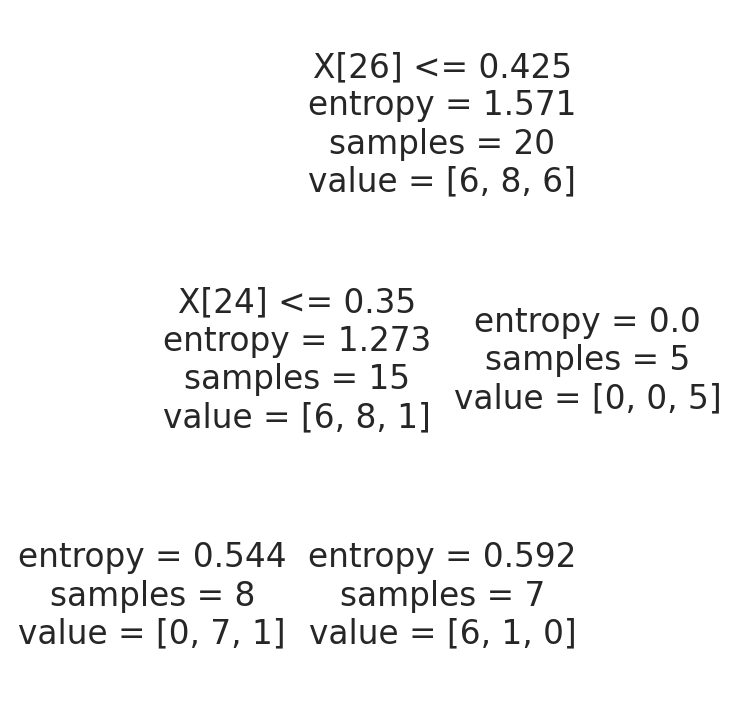

In [ ]:
fig = plt.figure(figsize=(13,13))
_ = tree.plot_tree(clf)
                   #feature_names=feature_names,
                   #class_names=X[:,3],
                   #filled=True)

In [ ]:
test1=[[2,4,0,1,1,1,3,1,1,2,1,1,2,1,1,2,3,3,2,3,3,3,1,2,0.45,0.25,0.30]]
test2=[[2,3,1,1,3,1,3,2,1,2,3,2,1,3,1,3,2,3,2,3,3,3,1,2,0.25,0.30,0.45]]
test3=[[2,5,0,1,1,1,1,2,2,3,1,3,1,1,3,2,2,2,2,3,3,3,3,2,0.30,0.35,0.35]]
test4=[[2,2,3,1,1,3,3,1,3,1,3,2,1,2,1,2,3,1,2,3,3,2,3,3,0.30,0.25,0.45]]
test5=[[2,5,3,1,2,1,3,1,2,1,2,2,3,1,1,2,2,3,2,3,1,3,3,2,0.30,0.40,0.30]]
test6=[[2,4,0,1,3,1,3,2,1,3,3,2,1,2,1,2,2,2,2,3,1,3,3,1,0.30,0.35,0.35]]
test7=[[2,3,0,1,2,1,1,2,3,3,1,2,1,2,1,3,2,2,3,2,3,3,1,2,0.30,0.40,0.30]]
test8=[[0,5,0,0,2,1,1,2,1,3,1,2,1,3,1,3,2,3,2,3,1,3,1,2,0.40,0.30,0.30]]

result1=model.predict(test1)
print(result1)
result2=model.predict(test2)
print(result2)
result3=model.predict(test3)
print(result3)
result4=model.predict(test4)
print(result4)
result5=model.predict(test5)
print(result5)
result6=model.predict(test6)
print(result6)
result7=model.predict(test7)
print(result7)
result8=model.predict(test8)
print(result8)

#List to store all results
result1 = result1.tolist()
result2 = result2.tolist()
result3 = result3.tolist()
result4 = result4.tolist()
result5 = result5.tolist()
result6 = result6.tolist()
result7 = result7.tolist()
result8 = result8.tolist()
results = []

['1']
['3']
['3']
['3']
['2']
['2']
['2']
['1']


In [ ]:
#Export predictions to output.csv ---> https://gist.github.com/korakot/3c9a33c12c6547ed38b2ca4b1e311426
#create, and save df
from gspread_dataframe import set_with_dataframe
title = 'output'
gc.create(title)  # if not exist

sheet = gc.open(title).sheet1
set_with_dataframe(sheet, df) 